In [1]:
# get all prop and to get the miniest noise and best FM
import numpy as np

process_x = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process.npy"
process_FM = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process_FM.npy"
process_N = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process_N.npy"

process_x = np.load(process_x)
process_FM = np.load(process_FM)
process_N = np.load(process_N)

print(process_x.shape, process_FM.shape, process_N.shape)

last_FM = process_FM[-1]
last_N  = process_N[-1]

mid_FM = process_FM[3]
mid_N  = process_N[3]

st_FM  = process_FM[1]
st_N   = process_N[1]


(100, 5) (500, 100) (500, 100)


In [2]:

from numpy.polynomial.polynomial import Polynomial
x1  = np.linspace(0.60,0.62,200)
x2  = np.linspace(0.595,0.625,200)
x3  = np.linspace(0.593,0.63,200)

p1 = Polynomial.fit(st_FM, st_N, 2)(x2)
p2 = Polynomial.fit(mid_FM, mid_N, 2)(x2)
p3 = Polynomial.fit(last_FM, last_N, 2)(x3)

po1 = np.argmin(last_N)
po2 = np.argmax(last_FM)
po3 = 35

print(po1,po2,po3)

8 62 35


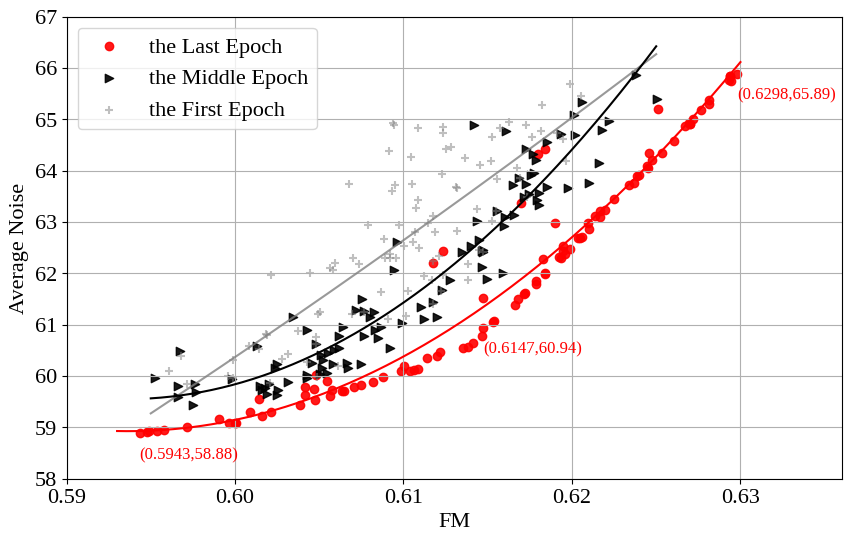

In [3]:
import matplotlib.pyplot as plt
import matplotlib

x_label = "FM"
y_label = "Average Noise"

matplotlib.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['font.size'] = 16  # 可以调整这个值来设置字体大小
plt.figure(figsize=(12,8)) 
plt.scatter(last_FM, last_N, color = "r", alpha=0.9, marker="o", label = "the Last Epoch")
plt.scatter(mid_FM,mid_N, color = "k", alpha = 0.9 , marker=">", label = "the Middle Epoch")
plt.scatter(st_FM, st_N, color = "grey", alpha=0.5, marker="+", label = "the First Epoch")

plt.text(last_FM[po1]+0.000,last_N[po1]-0.5, "({:.4f},{:.2f})".format(last_FM[po1],last_N[po1]),fontdict={'size': 12, 'color': 'red'})
plt.text(last_FM[po2]+0.000,last_N[po2]-0.5, "({:.4f},{:.2f})".format(last_FM[po2],last_N[po2]),fontdict={'size': 12, 'color': 'red'})
plt.text(last_FM[po3]+0.000,last_N[po3]-0.5, "({:.4f},{:.2f})".format(last_FM[po3],last_N[po3]),fontdict={'size': 12, 'color': 'red'})
plt.plot(x2, p1,color = "grey",alpha = 0.8)
plt.plot(x2, p2,color = "k")
plt.plot(x3, p3,color = "r")

plt.xlim(0.590,0.636)
plt.ylim(58,67)

plt.legend()
plt.grid(True)
# 设置X轴和Y轴的标签
plt.xlabel(x_label)  # X轴标签
plt.ylabel(y_label)  # Y轴标签

# 显示图表
plt.savefig('Pareto_FM_N.pdf')